In [136]:
import numpy as np
from numpy.linalg import inv
import pandas as pd
import matplotlib.pyplot as plt

In [137]:
path = 'C:/Users/khoat/OneDrive - National Economics University/Desktop/1. Study/3.1. Machine Learning/data/'

In [138]:
house_dataframe = pd.read_csv(path + 'data_linear.csv')
house_dataframe.rename(columns = {'Diện tích':'area', 'Giá':'price'}, inplace = True)

In [139]:
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
boston_dataframe = pd.read_csv(path + 'housing.csv', header=None, delimiter=r"\s+", names=column_names)

CRIM - per capita crime rate by town
ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
INDUS - proportion of non-retail business acres per town.
CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
NOX - nitric oxides concentration (parts per 10 million)
RM - average number of rooms per dwelling
AGE - proportion of owner-occupied units built prior to 1940
DIS - weighted distances to five Boston employment centres
RAD - index of accessibility to radial highways
TAX - full-value property-tax rate per $10,000
PTRATIO - pupil-teacher ratio by town
B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
LSTAT - % lower status of the population
MEDV - Median value of owner-occupied homes in $1000's

In [140]:
class LinearRegression:
    def __init__(self, df, target):
        self.df = df
        self.target = target

    def find_coefficient(self):
        t = np.array(self.df[self.target]).reshape(self.df.shape[0],1)
        feature = np.array(self.df.loc[:, self.df.columns != self.target]).reshape(self.df.shape[0], self.df.shape[1]-1)
        x = np.concatenate((np.ones((self.df.shape[0], 1)), feature), axis= 1)
        w = np.array(inv(x.T.dot(x)).dot(x.T).dot(t)).reshape(feature.shape[1]+1, 1)
        return w

    def predict_value(self, list1):
        array = np.array(list1).reshape(1,len(list1))
        w1 = self.find_coefficient()
        return array.dot(w1[1:,]) + w[0]

    def add_predict_column(self):
        newdf = self.df
        t = np.array(self.df[self.target]).reshape(self.df.shape[0],1)
        feature = np.array(self.df.loc[:, self.df.columns != self.target]).reshape(self.df.shape[0], self.df.shape[1]-1)
        x = np.concatenate((np.ones((self.df.shape[0], 1)), feature), axis= 1)
        w = np.array(inv(x.T.dot(x)).dot(x.T).dot(t)).reshape(feature.shape[1]+1, 1)
        newdf['predict'] = feature.dot(w[1:,]) + w[0]
        return newdf

In [141]:
house = LinearRegression(house_dataframe, 'price')
house.find_coefficient()

array([[-7.06426865],
       [15.2110908 ]])

In [142]:
print(house.predict_value([50]))
print(house.predict_value([100]))
print(house.predict_value([150]))

[[797.01402837]]
[[1557.56856835]]
[[2318.12310834]]


In [143]:
house_predict = house.add_predict_column()
house_predict.head()

,area,price,predict
0,30.0000,448.524,449.268455
1,32.4138,509.248,485.984986
2,34.8276,535.104,522.701517
3,37.2414,551.432,559.418048
4,39.6552,623.418,596.134579


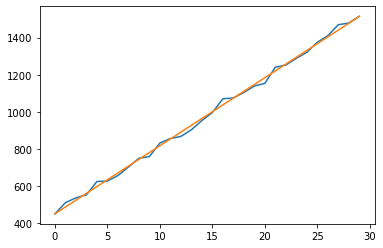

In [144]:
plt.plot(house_predict.price)
plt.plot(house_predict.predict)

In [145]:
boston = LinearRegression(boston_dataframe, 'MEDV')
boston.find_coefficient()

array([[ 3.64594884e+01],
       [-1.08011358e-01],
       [ 4.64204584e-02],
       [ 2.05586264e-02],
       [ 2.68673382e+00],
       [-1.77666112e+01],
       [ 3.80986521e+00],
       [ 6.92224640e-04],
       [-1.47556685e+00],
       [ 3.06049479e-01],
       [-1.23345939e-02],
       [-9.52747232e-01],
       [ 9.31168327e-03],
       [-5.24758378e-01]])

In [146]:
boston_predict = boston.add_predict_column()
boston_predict.sort_values(by= 'predict', ascending=True, inplace= True)
boston_predict.reset_index(inplace= True)
boston_predict

,index,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,predict
0,414,45.74610,0.0,18.10,0,0.6930,4.519,100.0,1.6582,24,666.0,20.2,88.27,36.98,7.0,-4.281311
1,374,18.49820,0.0,18.10,0,0.6680,4.138,100.0,1.1370,24,666.0,20.2,396.90,37.97,13.8,0.777798
2,412,18.81100,0.0,18.10,0,0.5970,4.628,100.0,1.5539,24,666.0,20.2,28.79,34.37,17.9,1.718518
3,384,20.08490,0.0,18.10,0,0.7000,4.368,91.2,1.4395,24,666.0,20.2,285.83,30.63,8.8,3.279181
4,490,0.20746,0.0,27.74,0,0.6090,5.093,98.0,1.8226,4,711.0,20.1,318.43,29.68,8.1,3.663997
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,163,1.51902,0.0,19.58,1,0.6050,8.375,93.9,2.1620,5,403.0,14.7,388.45,3.32,50.0,41.847282
502,203,0.03510,95.0,2.68,0,0.4161,7.853,33.2,5.1180,4,224.0,14.7,392.78,3.81,48.5,42.031931
503,204,0.02009,95.0,2.68,0,0.4161,8.034,31.9,5.1180,4,224.0,14.7,390.55,2.88,50.0,43.189498
504,257,0.61154,20.0,3.97,0,0.6470,8.704,86.9,1.8010,5,264.0,13.0,389.70,5.12,50.0,43.302390


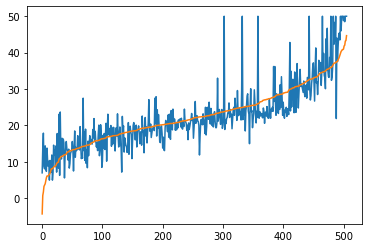

In [147]:
plt.plot(boston_predict.MEDV)
plt.plot(boston_predict.predict)